<a href="https://colab.research.google.com/github/ayushibongirwar/Apparel-Recognition-System/blob/main/Apparel_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#fashion company trying to identify diff items of clothing

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#dtaa has already been sorted inot training and testing set
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#show the first training example
print(f"Training sample:\n {train_data[0]}\n ")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

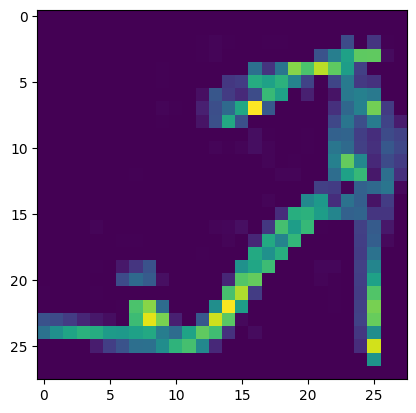

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[8]);

In [ ]:
#check out samples label
train_labels[8]

5

In [ ]:
#create a small list so we can index our training labels so they are human readable
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Dress')

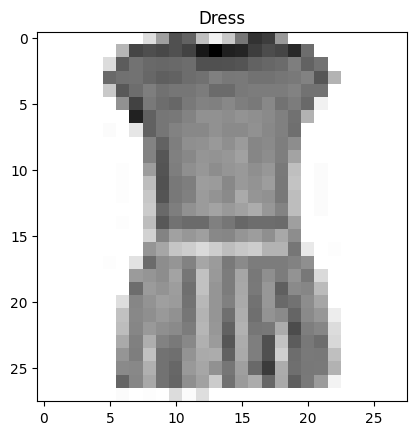

In [ ]:
#plot an xample image and its labels
index_of_choice=3
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

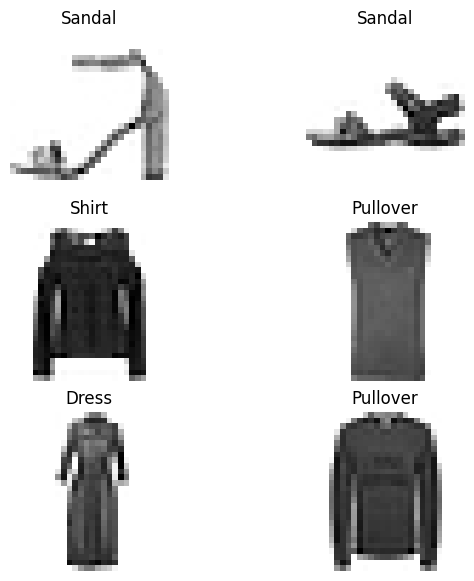

In [ ]:
#plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(6):
  ax=plt.subplot(3,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

model11=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model11.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2444 - accuracy: 0.1770 - val_loss: 2.0599 - val_accuracy: 0.1827
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8645 - accuracy: 0.2442 - val_loss: 1.6724 - val_accuracy: 0.2826
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6249 - accuracy: 0.2983 - val_loss: 1.5883 - val_accuracy: 0.3108
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5732 - accuracy: 0.3135 - val_loss: 1.5549 - val_accuracy: 0.3171
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5488 - accuracy: 0.3204 - val_loss: 1.5392 - val_accuracy: 0.3307
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5347 - accuracy: 0.3216 - val_loss: 1.5208 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5241 - accuracy: 0.3231 - val_loss: 1.5179 - val_accuracy:

In [ ]:
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##scaling features normalise or standardise 
#check min and max values of training data
train_data.min(), train_data.max()


(0, 255)

In [ ]:
#we can get our training and testing data between 0 & 1 by dividing by maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)
model12=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")
])
model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm ,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3521 - accuracy: 0.4650 - val_loss: 1.0098 - val_accuracy: 0.5821
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8576 - accuracy: 0.6522 - val_loss: 0.7628 - val_accuracy: 0.7181
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6847 - accuracy: 0.7265 - val_loss: 0.6891 - val_accuracy: 0.7269
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6454 - accuracy: 0.7347 - val_loss: 0.6589 - val_accuracy: 0.7329
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6279 - accuracy: 0.7392 - val_loss: 0.6529 - val_accuracy: 0.7334
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6157 - accuracy: 0.7416 - val_loss: 0.6447 - val_accuracy: 0.7352
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6075 - accuracy: 0.7440 - val_loss: 0.6588 - val_accuracy:

<Axes: title={'center': 'nrmalised data'}>

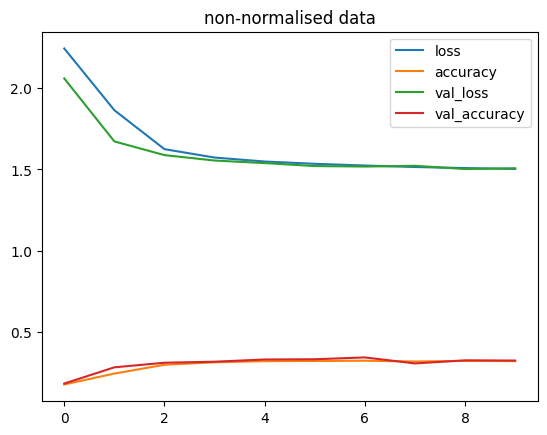

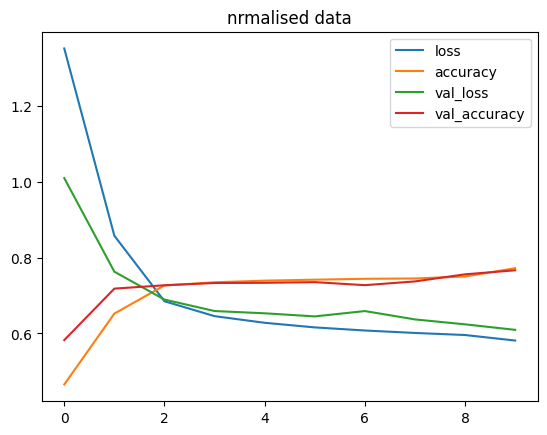

In [ ]:
import pandas as pd
#plot non normalised data
pd.DataFrame(non_norm_history.history).plot(title="non-normalised data")
pd.DataFrame(norm_history.history).plot(title="nrmalised data")

In [ ]:
tf.random.set_seed(42)

# Create the model
model13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model13.fit(train_data_norm,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3548 - accuracy: 0.5144 - val_loss: 1.0409 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8983 - accuracy: 0.7207 - val_loss: 0.8329 - val_accuracy: 0.7281 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7678 - accuracy: 0.7468 - val_loss: 0.7693 - val_accuracy: 0.7293 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7189 - accuracy: 0.7534 - val_loss: 0.7373 - val_accuracy: 0.7413 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6935 - accuracy: 0.7553 - val_loss: 0.7161 - val_accuracy: 0.7557 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6724 - accuracy: 0.7602 - val_loss: 0.7215 - val_accuracy: 0.7474 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'finding the ideal learning rate')

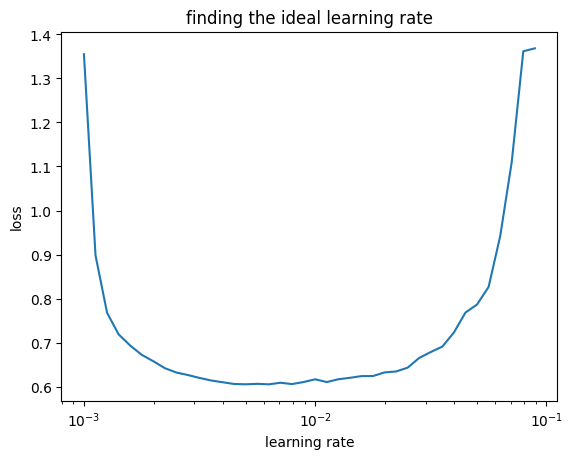

In [ ]:
#plot 
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding the ideal learning rate")

In [ ]:
#lets refit the model with ideal

tf.random.set_seed(42)

model14=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")
])
model14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history14 = model14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1564 - accuracy: 0.6034 - val_loss: 0.8494 - val_accuracy: 0.7028
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7527 - accuracy: 0.7290 - val_loss: 0.7097 - val_accuracy: 0.7461
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6356 - accuracy: 0.7854 - val_loss: 0.6317 - val_accuracy: 0.7884
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5857 - accuracy: 0.8031 - val_loss: 0.6029 - val_accuracy: 0.8005
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5627 - accuracy: 0.8100 - val_loss: 0.5929 - val_accuracy: 0.8021
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5458 - accuracy: 0.8155 - val_loss: 0.5961 - val_accuracy: 0.7999
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5357 - accuracy: 0.8183 - val_loss: 0.5938 - val_accur

In [ ]:
#create confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10),text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
   labels = classes
  else:
    labels = np.arange(cm.shape[0])
    
  # Label the axes
  ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes), # create enough axis slots for each class
          yticks=np.arange(n_classes), 
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)
    
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
   plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#make some predictions
y_probs = model14.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[6.55263122e-10, 3.76450560e-09, 2.54605892e-10, 4.92867858e-10,
        6.64948818e-10, 4.67694163e-01, 2.52345200e-10, 7.53719434e-02,
        5.17094632e-05, 4.56882238e-01],
       [1.89486183e-02, 6.14238856e-03, 7.89344370e-01, 1.45313293e-02,
        6.35613874e-02, 3.00331216e-04, 1.05585992e-01, 1.80595107e-05,
        1.56757026e-03, 1.40667513e-08],
       [3.65529329e-10, 9.99720335e-01, 2.03915675e-08, 2.46137170e-05,
        1.83026423e-04, 1.12188796e-13, 1.61131508e-09, 7.20232201e-05,
        8.63184135e-10, 1.36668571e-14],
       [1.68362824e-09, 9.99172270e-01, 4.32271330e-09, 3.65137967e-04,
        2.68056556e-05, 7.05418851e-13, 5.61773017e-10, 4.35749855e-04,
        4.59582705e-10, 1.64789103e-11],
       [1.16566300e-01, 4.97174478e-05, 1.83949873e-01, 1.71844736e-02,
        3.43608037e-02, 4.65586425e-07, 6.40362203e-01, 2.29219803e-11,
        7.52611505e-03, 1.37729384e-16]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.5526312e-10, 3.7645056e-09, 2.5460589e-10, 4.9286786e-10,
        6.6494882e-10, 4.6769416e-01, 2.5234520e-10, 7.5371943e-02,
        5.1709463e-05, 4.5688224e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [ ]:
#convert all pred inot int
y_preds=y_probs.argmax(axis=1)

y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics  import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[707,   0,  28,  95,   5,   1, 153,   0,  11,   0],
       [  1, 948,  12,  29,   9,   0,   1,   0,   0,   0],
       [ 10,   1, 721,  10, 184,   1,  66,   0,   7,   0],
       [ 27,  27,  11, 829,  61,   1,  39,   1,   4,   0],
       [  0,   8,  94,  21, 812,   0,  59,   0,   6,   0],
       [  0,   0,   1,   1,   0, 897,   0,  55,   8,  38],
       [120,   5, 156,  63, 159,   5, 480,   0,  12,   0],
       [  0,   0,   0,   0,   0,  28,   0, 945,   0,  27],
       [  3,   0,   3,   7,   9,  14,  30,   7, 927,   0],
       [  0,   0,   0,   0,   0,  20,   0,  65,   1, 914]])

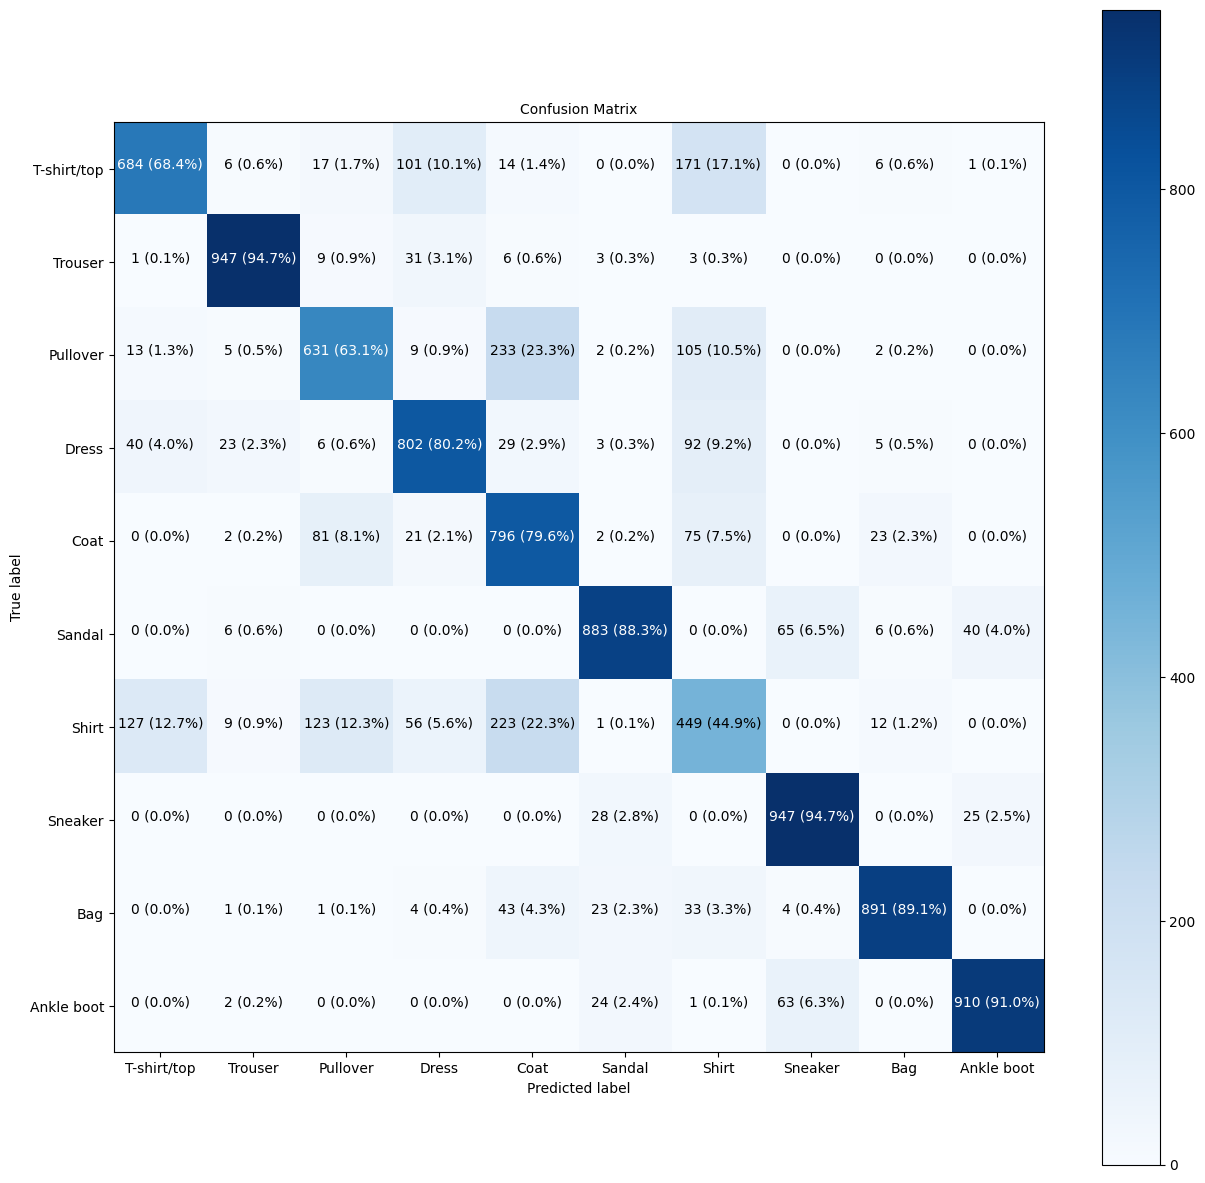

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
import random

def plot_random_img(model,images,true_labels,classes):
  """
  picks a random image plots it and labels it with a pred and truth label
  """
  #set up random int

  i = random.randint(0,len(images))

  #create pred and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  #add xlabel info
  plt.xlabel("pred: {} {:2.0f}%(true: {} )".format(pred_label,100*tf.reduce_max(pred_probs),true_label), color=color)

  

1/1 [==============================] - 0s 23ms/step


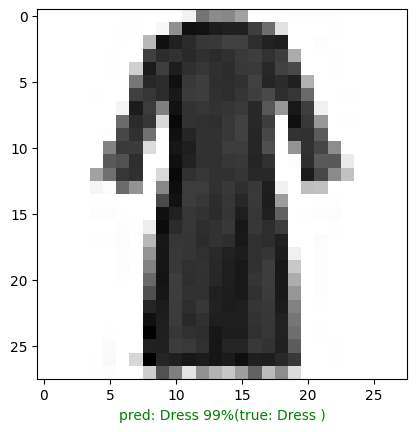

In [ ]:
plot_random_img(model14,test_data_norm,test_labels,class_names)

In [ ]:
#find the layers of pour most recent model
model14.layers

In [ ]:
model14.layers[1]

In [ ]:
#get patterns of layer
weights,biases=model14.layers[1].get_weights()

weights,weights.shape

(array([[ 0.27290022,  0.3806458 , -0.07204259,  0.4890303 ],
        [-1.0818223 ,  1.0985972 , -0.33920538,  0.38217932],
        [-0.79368055,  0.74936956, -0.73236006,  0.64977235],
        ...,
        [-0.19961576, -0.59497905,  0.01121607, -0.36471865],
        [-0.23773898, -0.04312152,  0.69036746, -0.79842436],
        [-0.5645673 , -0.12374152,  0.21124746, -0.31323627]],
       dtype=float32),
 (784, 4))